In [1]:
# delta Y_o matrix in equation 13

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import re

In [3]:
# Name of input Netcdf file
case_names = ['Jan', 'Feb', 'Mar'] # name parts of 3 simulations

input_directory = '/geos/u73/msadiq/GEOS-Chem/analysis/python/data/'
input_file = 'XCO2_model.nc'

output_directory = input_directory

# Name of output netCDF file
output_file = output_directory + 'delta_Y.nc'

In [19]:
ds_xco2_model = xr.open_dataset(input_directory + input_file)
varnames = list(ds_xco2_model.data_vars.keys())
#varnames[3:69]
ds_xco2_model

<xarray.Dataset>
Dimensions:                     (record: 406224)
Coordinates:
  * record                      (record) int64 0 1 2 3 ... 406221 406222 406223
Data variables:
    lat                         (record) float64 ...
    lon                         (record) float64 ...
    date                        (record) datetime64[ns] ...
    Jan_X_SpeciesConc_CO2Tag1   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag2   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag3   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag4   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag5   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag6   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag7   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag8   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag9   (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag10  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag11  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag12  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag13  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag14  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag15  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag16  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag17  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag18  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag19  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag20  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag21  (record) float32 ...
    Jan_X_SpeciesConc_CO2Tag22  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag1   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag2   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag3   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag4   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag5   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag6   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag7   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag8   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag9   (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag10  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag11  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag12  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag13  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag14  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag15  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag16  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag17  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag18  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag19  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag20  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag21  (record) float32 ...
    Feb_X_SpeciesConc_CO2Tag22  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag1   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag2   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag3   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag4   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag5   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag6   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag7   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag8   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag9   (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag10  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag11  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag12  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag13  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag14  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag15  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag16  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag17  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag18  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag19  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag20  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag21  (record) float32 ...
    Mar_X_SpeciesConc_CO2Tag22  (record) float32 ...
    xco2_obs                    (record) float32 ...

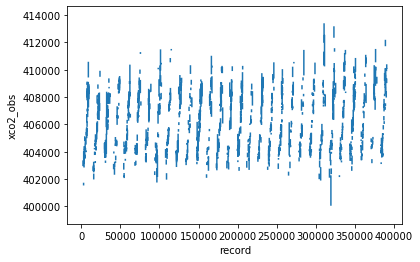

In [6]:
ds_xco2_model['xco2_obs'].plot()

In [7]:
tmp = np.array(np.zeros(66))
tmp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
delta_Y = ds_xco2_model['xco2_obs']
delta_Y['date'] = ds_xco2_model['date']
delta_Y['lat'] = ds_xco2_model['lat']
delta_Y['lon'] = ds_xco2_model['lon']
delta_Y = delta_Y.to_dataset()

for n, ivar in enumerate(varnames[3:69]):
    delta_Y[ivar] = ds_xco2_model['xco2_obs'] - ds_xco2_model[ivar]
    #delta_Y.coords['date'] = ds_xco2_model['date']
    tmp[n] = ds_xco2_model[ivar].mean().values

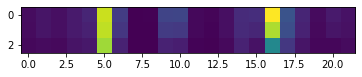

In [9]:
tmp1 = tmp.reshape(3,22)
plt.imshow(tmp1)
#plt.colorbar()

In [15]:
delta_Y['Jan_X_SpeciesConc_CO2Tag12']

<xarray.DataArray 'Jan_X_SpeciesConc_CO2Tag12' (record: 406224)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * record   (record) int64 0 1 2 3 4 5 ... 406219 406220 406221 406222 406223
    date     (record) datetime64[ns] 2018-03-01 2018-03-01 ... 2018-03-31

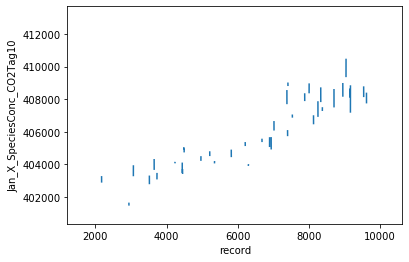

In [11]:
date1 = np.array('2018-03-01',dtype='datetime64[D]')
#slice_Y = delta_Y.where(delta_Y.date == date1)
ind = delta_Y.date == date1
slice_Y = delta_Y['Jan_X_SpeciesConc_CO2Tag10'][ind]
slice_Y.plot()

In [34]:
# Creat target dataarray and dataset
lat_res = 2    # horizontal resolution of lat and lon you would want
lon_res = 2.5
lat = np.linspace(-90, 90, int(180/lat_res + 1)) # grid
lon = np.linspace(-180, 177.5, int(360/lon_res))
first_day = '2018-03-01'
last_day_p1 = '2018-04-01'

day_1   = np.array(first_day,dtype='datetime64[D]')
day_end = np.array(last_day_p1,dtype='datetime64[D]')
days    = np.arange(day_1, day_end, dtype='datetime64[D]') # time dimension of output

var_2d = xr.DataArray(data = 0, 
                      dims = ('lat', 'lon'), 
                      coords = {'lat': lat,
                                'lon': lon},
                      name = '')
var_2d = var_2d.astype(dtype='float32')
delta_Y_2d = var_2d.to_dataset() # initialise a dataset to store all dataarrays

In [47]:
# map to target grid and store in dataset
for ivar in varnames[3:69]:
    print(ivar)
    var_2d[:,:] = 0
    for ilon in range(len(lon)):
        ind = delta_Y.lon == lon[ilon]
        delta_Y_tmp = delta_Y[ivar][ind]
        
        for ilat in range(len(lat)):
            ind2 = delta_Y_tmp.lat == lat[ilat]
            delta_Y_tmp2 = delta_Y_tmp[ind2]
            tmp = delta_Y_tmp2.dropna(dim='record')
            if len(tmp)!=0:
                var_2d[ilat,ilon] = tmp.mean().values
    print(ivar)
    delta_Y_2d[ivar] = var_2d

Jan_X_SpeciesConc_CO2Tag1
Jan_X_SpeciesConc_CO2Tag1
Jan_X_SpeciesConc_CO2Tag2
Jan_X_SpeciesConc_CO2Tag2
Jan_X_SpeciesConc_CO2Tag3
Jan_X_SpeciesConc_CO2Tag3
Jan_X_SpeciesConc_CO2Tag4
Jan_X_SpeciesConc_CO2Tag4
Jan_X_SpeciesConc_CO2Tag5
Jan_X_SpeciesConc_CO2Tag5
Jan_X_SpeciesConc_CO2Tag6


KeyboardInterrupt: 

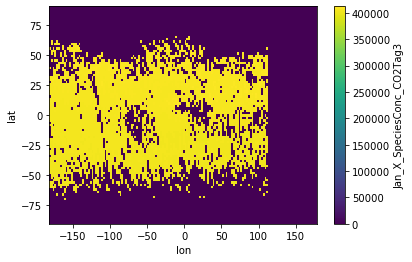

In [52]:
delta_Y_2d['Jan_X_SpeciesConc_CO2Tag3'].plot()

In [ ]:
for iday in days:
        ind = delta_Y.date == iday
        slice_Y = delta_Y[ivar][ind]
        
        # get a slice of position data within a day
        df_time_slice = df_position[df_position['sound_id'].between(begin, end)]
        
        for ilat in np.arange(len(lat)-1):
            # get a slice of position data within a degree of latitude band
            df_slice_lat = df_time_slice[df_time_slice['lat'].between(lat[ilat]-0.5*lat_res,lat[ilat]+0.5*lat_res, inclusive = True)]
            
            for ilon in np.arange(len(lon)-1):
                # get a slice of position data within a degree of longitude band, i.e. a grid cell in one day
                df_slice_lon = df_slice_lat[df_slice_lat['lon'].between(lon[ilon]-0.5*lon_res,lon[ilon]+0.5*lon_res, inclusive = True)]
            
                if len(df_slice_lon) != 0: # check if zero
                    sound_slice = df_slice_lon.sound_id.values # localtion of points, in sound id                
                    var_slice = ds[ivar].sel(sounding_id=sound_slice)
                    
                    if(len(var_slice.dims) == 1):
                        var_3d[iday,ilat,ilon] = var_slice.mean().values
                    else:
                        var_4d[iday,:,ilat,ilon] = var_slice.mean(dim='sounding_id').values
                        
        print(days[iday])
        
    if(nm_dim == 1):
        oco2[ivar] = var_3d.copy(deep=True)
    else:
        oco2[ivar] = var_4d.copy(deep=True)